# Explanations visualization moleculized

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from pysmiles import read_smiles
import networkx as nx

import numpy as np
from rdkit_heatmaps import mapvalues2mol
from rdkit_heatmaps.utils import transform2png

### Definition and preparation of an exemplary compound.

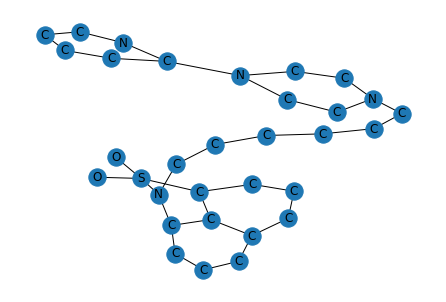

In [3]:
test_cpd_smile = "O=S1(=O)c2cccc3cccc(c23)N1CCCCCCN1CCN(c2ccccn2)CC1" #"Cc1ncsc1-c1nnc(SCCCN2CCC3(CC3c3ccc(C(F)(F)F)cc3)C2)n1C"
test_mol = Chem.MolFromSmiles(test_cpd_smile)
test_mol = Draw.PrepareMolForDrawing(test_mol)

pysmile_mol = read_smiles(test_cpd_smile)
labels = nx.get_node_attributes(pysmile_mol, 'element') 
nx.draw(pysmile_mol, labels = labels, pos=nx.spring_layout(pysmile_mol))

In [4]:
num_bonds = len(test_mol.GetBonds())
num_atoms = len(test_mol.GetAtoms())

print atoms in molecule

In [4]:
# for i in range(num_atoms):
#     print("Atom: ", i, " " , test_mol.GetAtomWithIdx(i).GetSymbol())

In [5]:
rdkit_bonds = {}

for i in range(num_bonds):
    init_atom = test_mol.GetBondWithIdx(i).GetBeginAtomIdx()
    end_atom = test_mol.GetBondWithIdx(i).GetEndAtomIdx()
    bond_type = test_mol.GetBondWithIdx(i).GetBondType()
    # print("Bond: ", i, " " , init_atom, "-" , end_atom, " ", bond_type)
    rdkit_bonds[(init_atom, end_atom)] = i
    #CNC(=O)CN1CN(c2ccccc2)C2(CCN(Cc3cc4c(cc3Cl)OCO4)CC2)C1=O
rdkit_bonds

{(0, 1): 0,
 (1, 2): 1,
 (1, 3): 2,
 (3, 4): 3,
 (4, 5): 4,
 (5, 6): 5,
 (6, 7): 6,
 (7, 8): 7,
 (8, 9): 8,
 (9, 10): 9,
 (10, 11): 10,
 (11, 12): 11,
 (11, 13): 12,
 (13, 14): 13,
 (14, 15): 14,
 (15, 16): 15,
 (16, 17): 16,
 (17, 18): 17,
 (18, 19): 18,
 (19, 20): 19,
 (20, 21): 20,
 (21, 22): 21,
 (22, 23): 22,
 (23, 24): 23,
 (24, 25): 24,
 (25, 26): 25,
 (26, 27): 26,
 (27, 28): 27,
 (28, 29): 28,
 (23, 30): 29,
 (30, 31): 30,
 (13, 1): 31,
 (31, 20): 32,
 (12, 3): 33,
 (29, 24): 34,
 (12, 7): 35}

In [6]:
labels = nx.get_node_attributes(pysmile_mol, 'element') 

Using Shapley values as bond weights

 Specific Shapley values and edge index for the given cpd

In [8]:
phi = {(0,1): 0.004804589437952713,
(1,0): 0.037527296611804414,
(1,2): 0.021103782884184873,
(1,3): -0.052546348327925124,
(1,13): -0.040318356688768466,
(2,1): -0.022028606948458616,
(3,1): 0.07974029741070005,
(3,4): -0.006614198215325752,
(3,12): -0.021014101794373363,
(4,3): 0.03505654242399792,
(4,5): -0.0038393888281031937,
(5,4): 0.0016437792561941205,
(5,6): -0.0033976024014162488,
(6,5): -0.0026489238588672404,
(6,7): -0.0008728883085591104,
(7,6): -0.00017529348261208444,
(7,8): -0.00032648177572094423,
(7,12): 0.009638558344815798,
(8,7): -0.007879493265408617,
(8,9): -3.3848168266625106e-05,
(9,8): -0.001399617747978801,
(9,10): -0.0009229161296278787,
(10,9): -0.0012317664062257544,
(10,11): 0.006197180959027612,
(11,10): -0.006374225299744678,
(11,12): -0.003247536006387279,
(11,13): -0.0030747203796669693,
(12,3): 0.008964595955383136,
(12,7): -0.0023989007309734574,
(12,11): 0.002977662910990273,
(13,1): 0.04582527771741612,
(13,11): -0.008384554344619223,
(13,14): 0.02315007194274204,
(14,13): -0.007825747542318212,
(14,15): 0.022551651706007723,
(15,14): 0.00022287831229396857,
(15,16): 0.01006389675869943,
(16,15): -0.005207768862695996,
(16,17): 0.0027777684238611796,
(17,16): -0.0013260592135597598,
(17,18): -0.03154709628681768,
(18,17): 0.009056197982248815,
(18,19): 0.015101732625316135,
(19,18): 0.020749772987336615,
(19,20): 0.028669729875604302,
(20,19): 0.07876737345630881,
(20,21): 0.13094073380202068,
(20,31): 0.15976155701176534,
(21,20): 0.10136053142382309,
(21,22): 0.02060926986676477,
(22,21): 0.04743890472889472,
(22,23): -0.012064145865007052,
(23,22): 0.08878263224456115,
(23,24): 0.028702565954874013,
(23,30): 0.07416006697569719,
(24,23): -0.06098182347213643,
(24,25): 0.043013894051482975,
(24,29): 0.004973186493778779,
(25,24): 0.014863112769626825,
(25,26): 0.0005598924431530199,
(26,25): 0.009339260852004346,
(26,27): -0.021821239378684774,
(27,26): 0.01462342172748144,
(27,28): -0.0019943788633834873,
(28,27): 0.005973748800663896,
(28,29): 0.0384646670255053,
(29,24): -0.013093114728823565,
(29,28): -0.014874322127620678,
(30,23): -0.0004240944623722277,
(30,31): 0.0199726952876485,
(31,20): 0.0486218152587206,
(31,30): 0.0022247345312195093}

###edge index for C#
# edge_index = [[ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  7,  7,  7,
#           8,  8,  8,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 15, 16,
#          16, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24,
#          24, 24, 25, 25, 26, 27, 27, 28, 28, 29, 29, 30, 30, 30, 31, 31],
#         [ 1,  0,  2,  1,  3, 31,  2,  4,  3,  5,  4,  6, 30,  5,  7,  6,  8, 29,
#           7,  9, 10,  8,  8, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 28, 15,
#          17, 16, 18, 17, 19, 27, 18, 20, 24, 19, 21, 20, 22, 21, 23, 22, 24, 19,
#          23, 25, 24, 26, 25, 18, 28, 15, 27,  7, 30,  5, 29, 31,  2, 30]]
# edge_index = [[ 0,  1,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,
#           8,  8,  9,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 14, 15, 15,
#          16, 16, 17, 17, 17, 17, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 22, 22,
#          23, 23, 23, 24, 24, 24, 24, 25, 26, 27, 28, 28, 29, 29, 30, 30, 31, 31,
#          31, 32],
#         [ 1,  0,  2,  5,  1,  3,  2,  4,  3,  5,  1,  4,  6,  5,  7, 31,  6,  8,
#           7,  9,  8, 10, 31,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 30, 14, 16,
#          15, 17, 16, 18, 19, 30, 17, 19, 17, 18, 20, 19, 21, 29, 20, 22, 21, 23,
#          22, 24, 28, 23, 25, 26, 27, 24, 24, 24, 23, 29, 20, 28, 14, 17,  6,  9,
#          32, 31]]
edge_index = [[atom[0] for atom in phi.keys()], 
            [atom[1] for atom in phi.keys()]]
###edge index for n1c

Get a single Phi values for each edge by summing the Phis of both directions

In [9]:
rdkit_bonds
rdkit_bonds_phi = [0]*num_bonds

is_phi_dict = True

if not is_phi_dict:
    for i in range(len(phi)):
        phi_value = phi[i]
        init_atom = edge_index[0][i]
        end_atom = edge_index[1][i]
        
        if (init_atom, end_atom) in rdkit_bonds:
            bond_index = rdkit_bonds[(init_atom, end_atom)]
            rdkit_bonds_phi[bond_index] += phi_value
        if (end_atom, init_atom) in rdkit_bonds:
            bond_index = rdkit_bonds[(end_atom, init_atom)]
            rdkit_bonds_phi[bond_index] += phi_value
else:
    for edge in phi.keys():
        phi_value = phi[edge]
        init_atom = edge[0]
        end_atom = edge[1]
        
        if (init_atom, end_atom) in rdkit_bonds:
            bond_index = rdkit_bonds[(init_atom, end_atom)]
            rdkit_bonds_phi[bond_index] += phi_value
        if (end_atom, init_atom) in rdkit_bonds:
            bond_index = rdkit_bonds[(end_atom, init_atom)]
            rdkit_bonds_phi[bond_index] += phi_value

# rdkit_bonds_phi

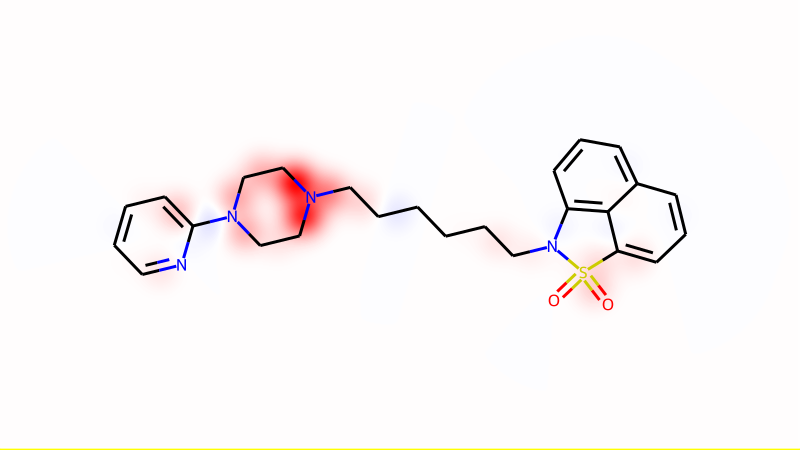

In [49]:
can = Draw.rdMolDraw2D.MolDraw2DCairo(800, 450)
draw_opt = can.drawOptions()
draw_opt.padding = 0.2
draw_opt.bondLineWidth = 3
# draw_opt.bgColor = (0.9, 0.5, 0.6)
draw_opt.setBackgroundColour((1,1,0))
# draw_opt.clearBackground = False
can.SetDrawOptions(draw_opt)

canvas = mapvalues2mol(test_mol, None, rdkit_bonds_phi, canvas = can, atom_width=0.2, bond_length=0.5, bond_width=0.5) #TBD: only one direction for edges? bonds weights is wrt rdkit bonds order?
# canvas = mapvalues2mol(test_mol, None, rdkit_bonds_phi, atom_width=0, bond_length=0, bond_width=0)
# opts = canvas.drawOptions()
# # # opts.clearBackground=True
# opts.setBackgroundColour((1,1,0))
# # opts.bondLineWidth = 1
# canvas.SetDrawOptions(opts)
# # canvas.drawOptions().setBackgroundColour((0.2,0.6,0.5))
# canvas.DrawMolecule(test_mol)
# canvas.FinishDrawing()
# img = transform2png(canvas.GetDrawingText())
# img.save("molecule_300dpi_no_background.png", dpi = (300,300))
# img
img = transform2png(canvas.GetDrawingText())
img.save("molecule_300dpi_no_background.png", dpi = (300,300))
img

### Colorbar

In [10]:
import pylab as pl
import numpy as np
import matplotlib.colors as colors

abs_max = np.max(np.abs(rdkit_bonds_phi))
v_lim = -abs_max, abs_max
normalizer = colors.Normalize(vmin=v_lim[0], vmax=v_lim[1])
norm = normalizer(rdkit_bonds_phi)

a = np.array([[-abs_max,abs_max]])
pl.figure(figsize=(0.7, 9))
img = pl.imshow(a, cmap="bwr")
pl.gca().set_visible(False)
pl.legend("Shapley values magnitude", loc="upper left")
# cax = pl.axes([0.1, 0.2, 0.8, 0.6]) #vertical
cax = pl.axes([0.1, 0.2, 0.8, 0.6]) #horizontal
pl.xticks( [-0.20, 0.20], ["A", "bb"])
pl.colorbar(orientation="vertical", cax=cax)
# pl.savefig("../color_bars/colorbar_edgeshaper_generals", dpi = 300, bbox_inches='tight')

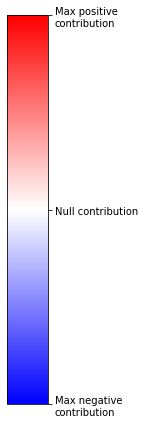

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(0.7, 9))
ax = fig.add_axes(([0.1, 0.2, 0.8, 0.6]))


cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', 
                               cmap='bwr')
plt.yticks([0,0.5, 1],['Max negative\ncontribution', "Null contribution", 'Max positive\ncontribution'])
plt.savefig('just_colorbar_.svg', bbox_inches='tight', format="svg", dpi=300)